In [1]:
import os
import math
import time
import random
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys

# custom imports
sys.path.append(os.path.abspath(os.path.join('..', '..', 'utils')))

In [3]:
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta',
    'yellow', 'black', 'orange', 'purple', 'brown',
    'pink', 'grey', 'maroon', 'gold', 'chocolate',
    'aqua', 'darkviolet', 'crimson', 'navy', 'darkgreen',
    'peru', 'tan', 'seagreen', 'darkslategrey', 'teal'
]

### First let's try to detect a straight line in a single-particle file

In [4]:
# Get all the "Hits" data files
root_dir = os.path.join('..', '..', '..', 'data', 'pdg13-n1-1GeV-0.5eta')
hit_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
dfs = [pd.read_csv(os.path.join(root_dir, file)) for file in hit_files]
dfs[0]

,particle_id,geometry_id,tx,ty,tz,tt,tpx,tpy,tpz,te,deltapx,deltapy,deltapz,deltae,index
0,4503599644147712,936748859932016666,30.413637,11.115355,5.232724,0.110008,0.935862,0.352368,0.161595,1.018468,0,0,0,0,0
1,4503599644147712,936748997370970292,64.061615,24.201923,11.066949,0.232662,0.928015,0.372542,0.161595,1.018468,0,0,0,0,1
2,4503599644147712,936749134809923918,106.106827,41.751125,18.429562,0.387448,0.917493,0.397752,0.161595,1.018468,0,0,0,0,2
3,4503599644147712,936749272248877698,157.508713,65.075996,27.551474,0.579219,0.903508,0.428572,0.161595,1.018468,0,0,0,0,3
4,4503599644147712,1297036830121656806,236.034622,104.896332,41.780827,0.878365,0.879632,0.475655,0.161595,1.018468,0,0,0,0,4
5,4503599644147712,1297036967560610509,324.346497,156.205612,58.287987,1.225398,0.848868,0.528605,0.161595,1.018468,0,0,0,0,5
6,4503599644147712,1297037104999564444,441.400421,236.195892,81.205002,1.707186,0.800907,0.598789,0.161595,1.018468,0,0,0,0,6
7,4503599644147712,1297037242438518651,565.066467,338.278687,107.127823,2.252166,0.739699,0.672937,0.161595,1.018468,0,0,0,0,7
8,4503599644147712,1657324800311298359,676.431946,449.645935,132.587845,2.787417,0.672925,0.739710,0.161595,1.018468,0,0,0,0,8
9,4503599644147712,1657324800311298360,681.167236,454.873383,133.727631,2.811379,0.669791,0.742550,0.161595,1.018468,0,0,0,0,9


In [5]:
random_event = random.choice(range(0, len(dfs)))
print(f'Event chosen: {hit_files[random_event]}')
df = dfs[random_event]

Event chosen: event000000095-hits.csv


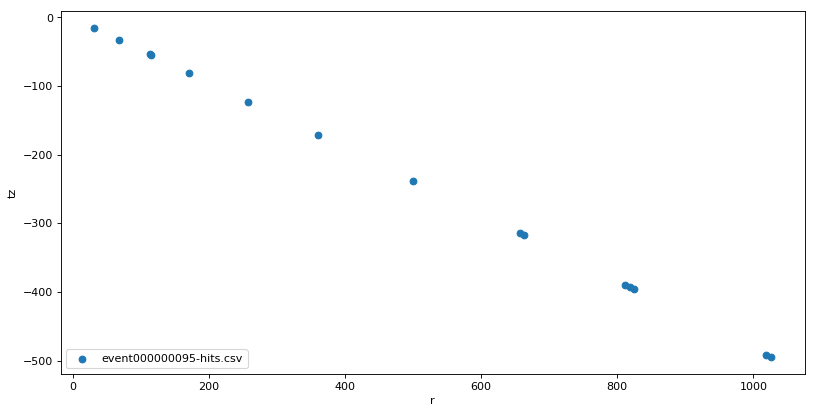

In [6]:
plt.figure(figsize=(12, 6), dpi=80)
r = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
plt.scatter(x=r, y=df['tz'], label=hit_files[random_event])

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='lower left')

Let's take all the points and visualize them in the Parameter space.

In [7]:
lines_in_parameter_space = [(-x_i, y_i) for x_i, y_i in zip(r, df['tz'])]
lines_in_parameter_space

[(-32.10240433995272, -15.251352300000002),
 (-67.94163459010929, -32.2797432),
 (-113.65409133327819, -54.0049095),
 (-115.47724770319361, -54.8715591),
 (-170.50835229715247, -81.0399323),
 (-258.0126442561091, -122.69845600000001),
 (-360.6097099305232, -171.652893),
 (-500.3168366035145, -238.589447),
 (-663.3143044443863, -317.24017299999997),
 (-657.0469831004918, -314.202606),
 (-824.7676619494313, -395.934784),
 (-811.2321240753054, -389.30181899999997),
 (-818.0407810380362, -392.637451),
 (-1018.3699549245011, -491.65387000000004),
 (-1025.4391173690112, -495.18191500000006)]

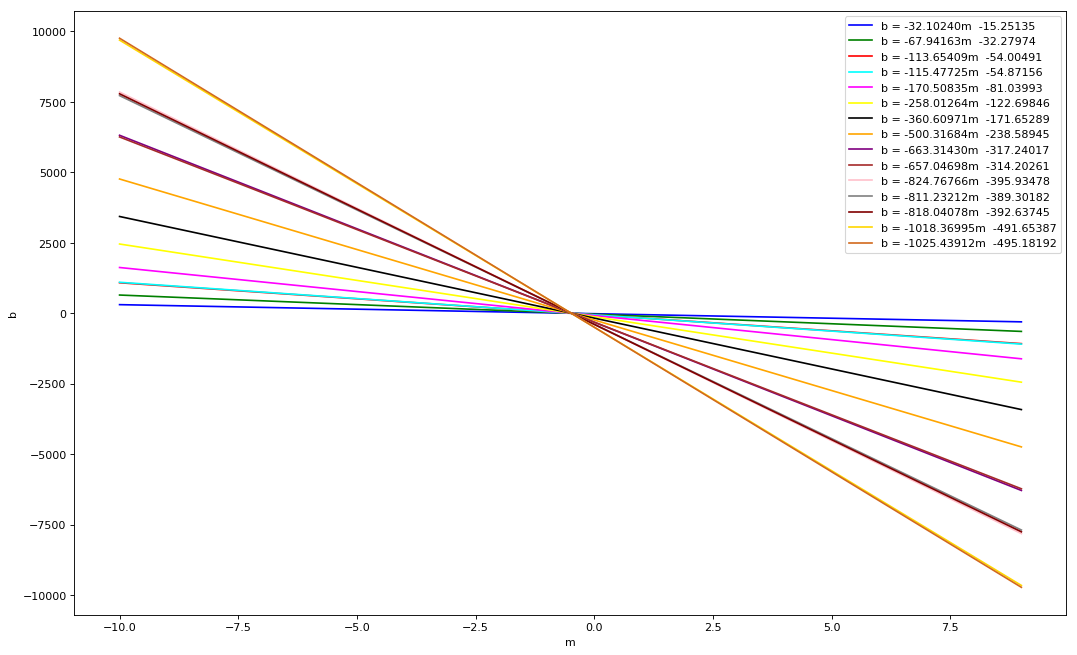

In [8]:
x_range = np.arange(-10, 10)

plt.figure(figsize=(16, 10), dpi=80)
for idx, line in enumerate(lines_in_parameter_space):
    m, b = line
    plt.plot(x_range, m * x_range + b, color=colors[idx % len(colors)],
             label=f"b = -{-m:.5f}m {('+' if b > 0 else '')} {b:.5f}")
    
plt.xlabel('m')
plt.ylabel('b')
plt.legend(loc='best')
plt.show()

Let's find all the intersection points.

In [9]:
round_accuracy = 3
intersections = {}
for idx, first_line in enumerate(lines_in_parameter_space):
    m1, b1 = first_line
    for second_line in lines_in_parameter_space[idx+1:]:
        m2, b2 = second_line
        intersection_x = round(- (b2 - b1) / (m2 - m1), round_accuracy)
        intersection_y = round(m1 * intersection_x + b1, round_accuracy)
        intersections[(intersection_x, intersection_y)] = intersections.get((intersection_x,
                                                                             intersection_y), 0) + 1

# get the parameters with the highest intersection count
optimal_m, optimal_b = max(intersections, key=intersections.get)
optimal_m, optimal_b

(-0.475, -0.003)

Let's make a plot to see the results.

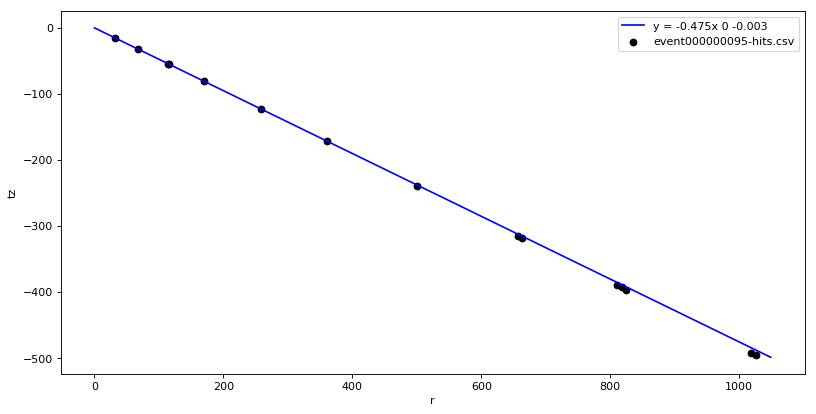

In [10]:
plt.figure(figsize=(12, 6), dpi=80)
r = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
plt.scatter(x=r, y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
plt.plot(xs, optimal_m * xs + optimal_b, color='b',
         label=f"y = {optimal_m}x {('+' if optimal_b > 0 else '0')} {optimal_b}")

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

### Now let's try for many-particle files

In [11]:
# Get all the data files
root_dir = os.path.join('..', '..', '..', 'data', 'pdg13-n25-0.5to10GeV-0.5eta')

hit_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
final_files = sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_final.csv")])

dfs = [pd.read_csv(os.path.join(root_dir, file), dtype={'particle_id':str, 'geometry_id': str})
       for file in hit_files]
final_dfs = [pd.read_csv(os.path.join(root_dir, file), dtype={'particle_id':str, 'geometry_id': str})
             for file in final_files]

dfs[0]

,particle_id,geometry_id,tx,ty,tz,tt,tpx,tpy,tpz,te,deltapx,deltapy,deltapz,deltae,index
0,4503599728033792,936748859932016651,32.272884,-0.712434,-0.315054,0.107714,4.315339,-0.085583,-0.042125,4.317686,0,0,0,0,0
1,4503599946137600,936748859932016651,32.187237,-0.001743,-2.157965,0.108509,0.813235,0.009605,-0.054525,0.821937,0,0,0,0,0
2,4503599862251520,936748859932016652,31.425819,6.312224,13.246838,0.115860,1.766618,0.364646,0.745482,1.954690,0,0,0,0,0
3,4503599962914816,936748859932016652,32.797543,-5.063643,9.198400,0.114882,7.182126,-1.098788,2.013875,7.540367,0,0,0,0,1
4,4503599644147712,936748859932016666,30.526699,10.914364,5.238789,0.109587,3.401895,1.226618,0.584373,3.664715,0,0,0,0,0
5,4503599862251520,936748859932016666,32.940971,6.625372,13.886239,0.121452,1.766431,0.365555,0.745482,1.954690,0,0,0,0,1
6,4503599912583168,936748859932016679,-20.531666,-24.508099,-1.511850,0.106804,-2.511400,-3.012717,-0.185468,3.927997,0,0,0,0,0
7,4503599744811008,936748859932016694,-7.851760,-30.985767,3.505122,0.107279,-1.502871,-5.969863,0.675048,6.193927,0,0,0,0,0
8,4503599979692032,936748859932016707,6.581261,-31.393381,-11.756757,0.114065,0.470587,-2.197890,-0.823849,2.396260,0,0,0,0,0
9,4503600030023680,936748859932016707,5.025425,-31.580996,-14.615366,0.117314,0.645030,-3.992521,-1.848399,4.447924,0,0,0,0,0


In [12]:
random.seed(218)
random_event = random.choice(range(0, len(dfs)))
print(f'Event chosen: {hit_files[random_event]}')
df = dfs[random_event]

Event chosen: event000000038-hits.csv


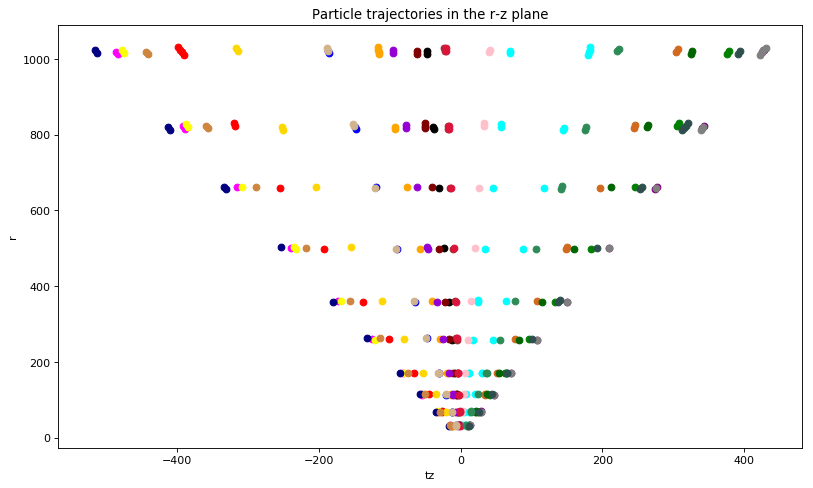

In [13]:
# get every particle
unique_particle_ids = list(set(df['particle_id']))
plt.figure(figsize=(12, 7), dpi=80)

# plot its track
for idx, pid in enumerate(unique_particle_ids):
    particle_df = df[df['particle_id'] == pid]
    r = np.sqrt(np.square(particle_df['tx']) + np.square(particle_df['ty']))
    plt.scatter(x=particle_df['tz'], y=r, color=colors[idx])

plt.xlabel('tz')
plt.ylabel('r')
plt.title('Particle trajectories in the r-z plane')
plt.show()

Let's plot the points in the parameter space (where they become lines).

In [14]:
df['r'] = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
df['track'] = df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
df['weight'] = 1.0

# book-keeping: store which particles form which track in the Hough space
all_tracks = []

for row, series in df.iterrows():
    hit = series['track']
    # a hit becomes a track in the Hough space
    all_tracks.append(hit)

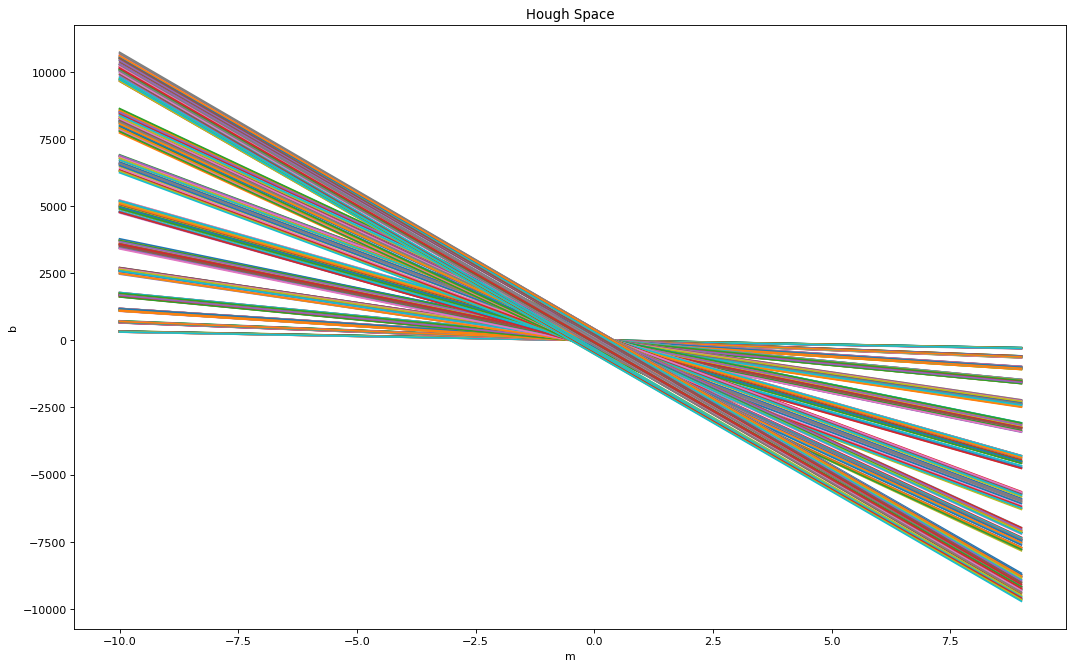

In [15]:
x_range = np.arange(-10, 10)

plt.figure(figsize=(16, 10), dpi=80)
for track in all_tracks:
    m, b = track
    plt.plot(x_range, m * x_range + b)

plt.xlabel('m')
plt.ylabel('b')
plt.title('Hough Space')
plt.show()

There are about 300 lines. Since we know there are 24 particles, let's try to find the most 24 "common points of intersection".

In [16]:
# search for intersections and store them
round_accuracy = 2
intersections = {}

# loop over all the tracks
for idx, first_line in enumerate(all_tracks):
    m1, b1 = first_line
    for second_line in all_tracks[idx+1:]:
        m2, b2 = second_line
        intersection_x = round(- (b2 - b1) / (m2 - m1), round_accuracy)
        intersection_y = round(m1 * intersection_x + b1, round_accuracy)
        intersections[(intersection_x, intersection_y)] = intersections.get((intersection_x,
                                                                             intersection_y), 0) + 1

# get the "top" parameters with the highest intersection count
tracks_found = sorted(intersections, key=intersections.get, reverse=True)[:len(unique_particle_ids)]

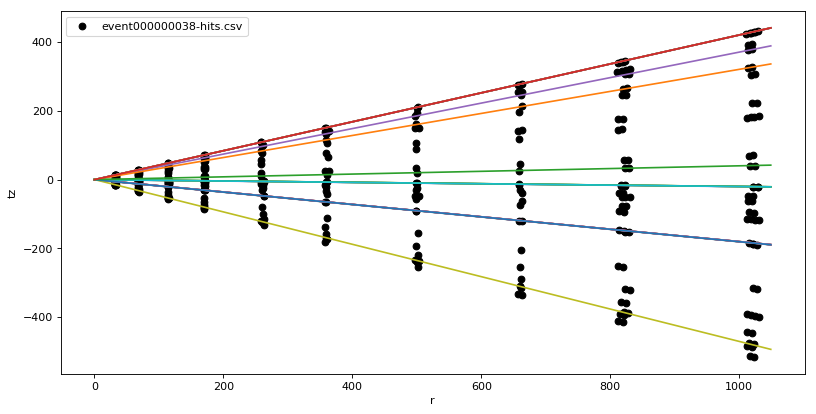

In [17]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=df['r'], y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
for idx, line in enumerate(tracks_found):
    m, b = line
    plt.plot(xs, m * xs + b)

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

This doesn't give optimal results. Maybe it would be better to discretize the plane into small squares (bins).

In [18]:
def truncate(f, n):
    """ Truncates the digits of a floating point number. e.g.: f(0.8756343, 3) = 0.875 """
    return math.floor(f * 10 ** n) / 10 ** n

In [19]:
# range of search for slope (m) and intercept (b) values: bin size
m_boundary = 0.75
b_boundary = 0.1
bin_size = (0.01, 0.01)
m_range = np.arange(-m_boundary, m_boundary, bin_size[0])
b_range = np.arange(-b_boundary, b_boundary, bin_size[1])

# accumulator array that will store the scores (votes) of the tracks
accumulator = np.zeros((m_range.shape[0], b_range.shape[0]))
execution_time = time.time()

# dictionary that stores which tracks go through each bin
tracks_per_bin = {}

# loop for all the tracks in the Hough space
for idx, track_1 in enumerate(all_tracks):
    m1, b1 = track_1

    # find intersections with all the other tracks
    for track_2 in all_tracks[idx+1:]:
        m2, b2 = track_2
        
        # find the intersection point of the two tracks
        intersection_x = - (b2 - b1) / (m2 - m1)
        intersection_y = m1 * intersection_x + b1

        # if the intersection point is outside of the boundary, ignore it
        if (not -m_boundary <= intersection_x <= m_boundary) or not (-b_boundary <= intersection_y <= b_boundary):
            continue

        # reduce to 3 decimal digits (since the bin has a width of 0.001)
        bin_x = int((intersection_x - (-m_boundary) - 1e-12) / bin_size[0])
        bin_y = int((intersection_y - (-b_boundary) - 1e-12) / bin_size[1])
        
        # increment the accumulator for that bin and add the tracks to the bin
        accumulator[bin_x, bin_y] += 1
        if (bin_x, bin_y) not in tracks_per_bin:
            tracks_per_bin[(bin_x, bin_y)] = [track_1, track_2]
        else:
            tracks_per_bin[(bin_x, bin_y)].extend((track_1, track_2))


# remove duplicate tracks from inside the same bin
for _bin, tracks_in_it in tracks_per_bin.items():
    tracks_per_bin[_bin] = list(set(tracks_in_it))

execution_time = time.time() - execution_time
print(f'Execution Time: {execution_time}')

Execution Time: 0.0868523120880127


Let's get the "top" bins.

In [20]:
def largest_indices(arr, n):
    """ Returns the n largest indices from a numpy array. """
    flat = arr.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, arr.shape)

# get the indices of the bins with the most hits
l = largest_indices(accumulator, len(unique_particle_ids))
# split the list in x-coordinates (actually r-coordinates) and y-coordinates (actually z-coordinates)
bin_xs, bin_ys = l

est_tracks_to_hits = {}
for bin_x, bin_y in zip(bin_xs, bin_ys):
    key_m = -m_boundary + bin_x * bin_size[0]
    key_b = -b_boundary + bin_y * bin_size[1]
    est_tracks_to_hits[(key_m, key_b)] = tracks_per_bin[(bin_x, bin_y)]
est_tracks = list(est_tracks_to_hits)

Let's plot the tracks predicted according to the top bins selected.

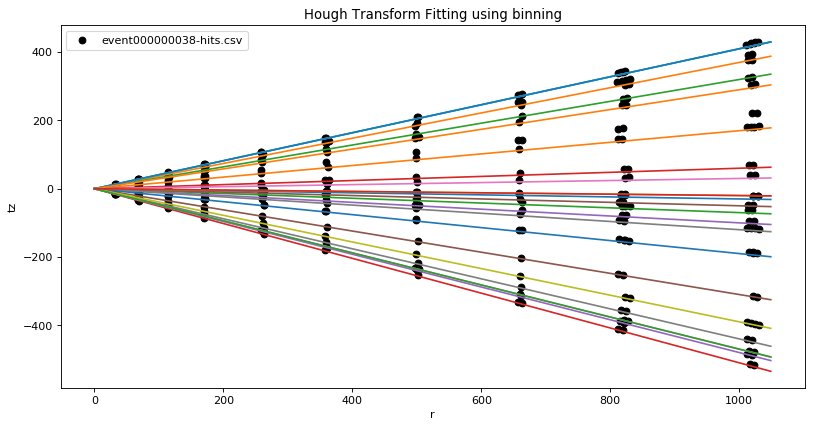

In [21]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=df['r'], y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
for track in est_tracks:
    m, b = track
    plt.plot(xs, m * xs + b)

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')
plt.title('Hough Transform Fitting using binning')
plt.show()

This looks much more accurate. Seems like we are missing three tracks.

### Now let's define some metrics to measure how well those lines are fitting the data

First, let's get the real (ground truth) tracks, amd plot them for a sanity check.

In [22]:
true_tracks = []
for pid in unique_particle_ids:
    particle_df = df[df['particle_id'] == pid]
    
    x1, y1 = particle_df['r'].iloc[0], particle_df['tz'].iloc[0]
    x2, y2 = particle_df['r'].iloc[-1], particle_df['tz'].iloc[-1]
    
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    true_tracks.append((m, b))

true_tracks

[(-0.18288553316873454, 0.10933239664294803),
 (0.37107904494987903, -0.00540806342137401),
 (-0.3861526186828126, 0.0246604624637925),
 (0.06883574225131564, -0.0007108922888066083),
 (-0.47714143716660695, 0.005602487063447015),
 (-0.46771837676263717, 0.011607017877247827),
 (-0.046753658749116696, 0.00043577996025456756),
 (-0.11357775984357023, 0.002116064770912196),
 (0.41824653828273756, -0.005326560786855339),
 (-0.022111174484994417, 0.00024715289102650306),
 (0.03987435630378187, -0.0008342897597917176),
 (0.41796126879748063, -0.028216335571420004),
 (-0.06096559921141771, 0.000422664942330897),
 (-0.30811705984523025, 0.005048141002371054),
 (0.2989778305186538, -0.03423173877056662),
 (0.1777583110450565, -0.0010772583407421266),
 (-0.09359969834505566, 0.0017220161718314309),
 (-0.019687808963906525, 0.0028988762836154036),
 (-0.5043725925469829, 0.002910729508744936),
 (0.32054358993364407, -0.003918637969062999),
 (-0.43568159975724247, 0.023141276150916212),
 (-0.18375

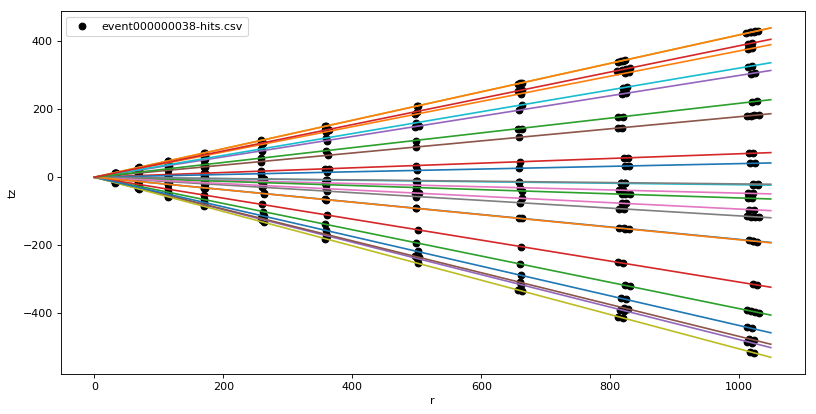

In [23]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=df['r'], y=df['tz'], label=hit_files[random_event], color='k')
xs = np.arange(0, 1050)
for track in true_tracks:
    m, b = track
    plt.plot(xs, m * xs + b)

plt.xlabel('r')
plt.ylabel('tz')
plt.legend(loc='best')

## Let's assess the fitting

Let's start by plotting the matching probability for every track fitted.

In [24]:
from metrics import get_track_to_truth_row_mapping, matching_probability

track_to_truth_df_row = get_track_to_truth_row_mapping(df)
track_to_matching_probability = {}
for track, hits, in est_tracks_to_hits.items():
    track_as_str = '({:.3f}, {:.3f})'.format(track[0], track[1])
    track_to_matching_probability[track_as_str] = matching_probability(hits, track_to_truth_df_row, df)[1]

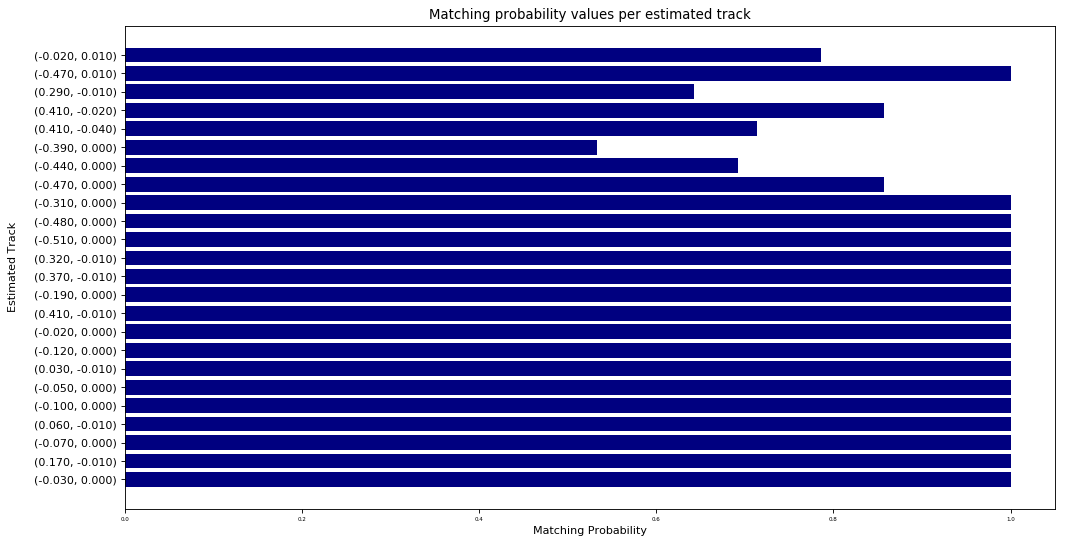

In [25]:
plt.figure(figsize=(15, 8), dpi=80)
plt.ylabel('Estimated Track\n')
plt.xticks(fontsize=5)
plt.xlabel('Matching Probability')
plt.barh(list(track_to_matching_probability.keys()), list(track_to_matching_probability.values()), color='navy')
plt.title('Matching probability values per estimated track')
plt.show()

Now let's import some scalar-metrics.

In [26]:
from metrics import efficiency_rate

print(f'Efficiency Rate of Estimated Tracks: {efficiency_rate(est_tracks_to_hits.values(), df):.2f}')

Efficiency Rate of Estimated Tracks: 0.83


In [27]:
from metrics import fake_rate

print(f'Fake Rate of Estimated Tracks: {fake_rate(est_tracks_to_hits.values(), df):.2f}')

Fake Rate of Estimated Tracks: 0.00


In [28]:
from metrics import duplicate_rate

print(f'Duplicate Rate of Estimated Tracks: {duplicate_rate(est_tracks_to_hits.values(), df):.2f}')

Duplicate Rate of Estimated Tracks: 0.17


## Now let's calculate the efficiency for different eta, p_T values

First we need to group together the tracks with similar eta values. Therefore, we have to calculate the eta, p_T values.

In [29]:
etas = []
p_ts = []

for df, final_df in zip(dfs, final_dfs):
    
    # add r and weight values
    df['r'] = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
    df['track'] = df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
    df['weight'] = 1.0
    
    # compute transverse momentum and pseudorapidity
    final_df['pt'] = np.sqrt(final_df['px'] ** 2 + final_df['py'] ** 2)
    final_df['|p|'] = np.sqrt(final_df['px'] ** 2 + final_df['py'] ** 2 + final_df['pz'] ** 2)
    final_df['theta'] = np.arccos(final_df['pz'] / final_df['|p|'])
    final_df['eta'] = -np.log(np.tan(final_df['theta'] / 2))
    
    for p_t, eta in zip(final_df['pt'], final_df['eta']):
        p_ts.append(p_t)
        etas.append(eta)

p_ts = list(set(p_ts))
etas = list(set(etas))

min_p_t = min(p_ts)
max_p_t = max(p_ts)
print(f'Min p_T = {min_p_t},\tMax p_T = {max_p_t}')

min_eta = min(etas)
max_eta = max(etas)
print(f'Min eta = {min_eta},\tMax eta = {max_eta}')

Min p_T = 0.4760132564975064,	Max p_T = 9.99672912017243
Min eta = -0.4999352873777553,	Max eta = 0.4997097385596001


Let's start with eta.

In [30]:
from notebook1_utils import get_str

number_of_bins = 10
bin_length = (max_eta - min_eta) / number_of_bins

etas_range = np.arange(min_eta, max_eta + 1e-8, bin_length)
eta_keys = ['{} – {}'.format(get_str(etas_range[i]), get_str(etas_range[i+1]))
            for i in range(0, len(etas_range) - 1)]

df_per_eta = [pd.DataFrame(columns=dfs[0].columns) for _ in range(number_of_bins)]
tracks_per_bin = np.zeros(number_of_bins)

# iterate through all the dataframes and start placing each particle track in the corresponding eta dataframe
for idx, (df, final_df) in enumerate(zip(dfs, final_dfs)):
    _df = df.copy()
    unique_particles = set(_df['particle_id'])
    _df['particle_id'] = _df['particle_id'] + '_{}'.format(idx)
    
    for pid in unique_particles:
        particle_df = _df[_df['particle_id'] == pid + '_{}'.format(idx)]
        eta = final_df.loc[final_df['particle_id'] == pid, 'eta'].item()
        _bin = int((eta - min_eta - 1e-12) / bin_length)

        df_per_eta[_bin] = pd.concat([df_per_eta[_bin], particle_df], sort=False)
        tracks_per_bin[_bin] += 1
        
# reset the indices
for _bin in range(number_of_bins):
    df_per_eta[_bin] = df_per_eta[_bin].reset_index().drop(['level_0'], axis=1)

Plot efficiency for every eta range.

In [31]:
from notebook1_utils import pipeline

bin_width = 1e-2
bin_height = 1e-2
bin_size = (bin_width, bin_height)

m_limit = (-0.75, 0.75)
b_limit = (-1, 1)
limits = (m_limit, b_limit)

efficiency_per_eta = {}
for _bin in range(number_of_bins):
    print(f'Starting bin {_bin}')
    df = df_per_eta[_bin]
    est_tracks_to_hits = pipeline(df, bin_size, limits, {'minimum-hits-per-bin': 10})
    efficiency_per_eta[eta_keys[_bin]] = efficiency_rate(est_tracks_to_hits.values(), df)

Starting bin 0
Starting bin 1
Starting bin 2
Starting bin 3
Starting bin 4
Starting bin 5
Starting bin 6
Starting bin 7
Starting bin 8
Starting bin 9


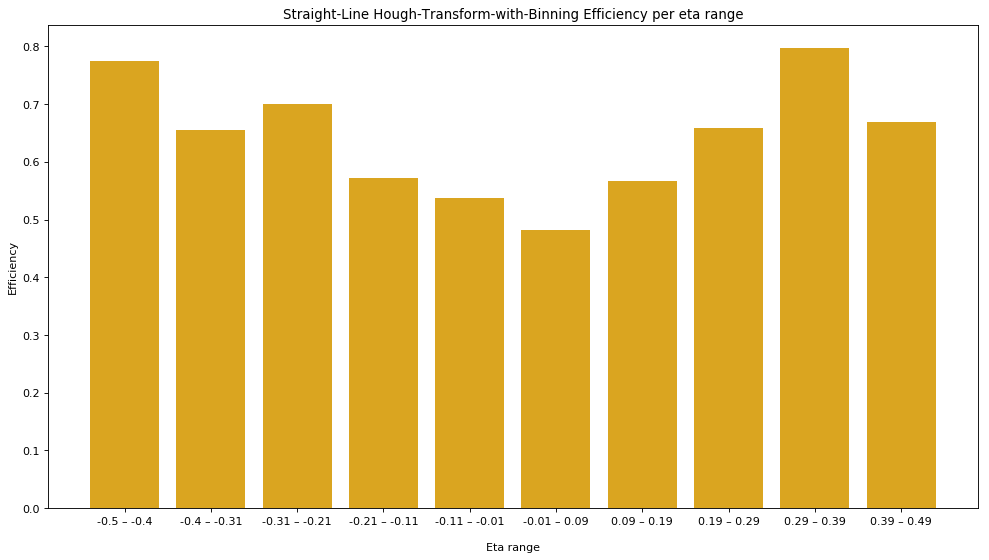

In [32]:
plt.figure(figsize=(15, 8), dpi=80)
plt.xlabel('\nEta range')
plt.ylabel('Efficiency')
plt.bar(list(efficiency_per_eta.keys()), list(efficiency_per_eta.values()), color='goldenrod')
plt.title('Straight-Line Hough-Transform-with-Binning Efficiency per eta range')
plt.show()

Let's do the same for p_T.

In [33]:
number_of_bins = 10
bin_length = (max_p_t - min_p_t) / number_of_bins

p_ts_range = np.arange(min_p_t, max_p_t + 1e-8, bin_length)
p_t_keys = ['{} – {}'.format(get_str(p_ts_range[i]), get_str(p_ts_range[i+1]))
            for i in range(0, len(p_ts_range) - 1)]

df_per_p_t = [pd.DataFrame(columns=dfs[0].columns) for _ in range(number_of_bins)]
tracks_per_bin = np.zeros(number_of_bins)

# iterate through all the dataframes and start placing each particle track in the corresponding p_T dataframe
for idx, (df, final_df) in enumerate(zip(dfs, final_dfs)):
    _df = df.copy()
    unique_particles = set(_df['particle_id'])
    _df['particle_id'] = _df['particle_id'] + '_{}'.format(idx)

    for pid in unique_particles:
        particle_df = _df[_df['particle_id'] == pid + '_{}'.format(idx)]
        p_t = final_df.loc[final_df['particle_id'] == pid, 'pt'].item()
        _bin = int((p_t - min_p_t - 1e-12) / bin_length)

        df_per_p_t[_bin] = pd.concat([df_per_p_t[_bin], particle_df], sort=False)
        tracks_per_bin[_bin] += 1

# reset the indices
for _bin in range(number_of_bins):
    df_per_p_t[_bin] = df_per_p_t[_bin].reset_index().drop(['level_0'], axis=1)

In [34]:
bin_width = 1e-2
bin_height = 1e-2
bin_size = (bin_width, bin_height)

m_limit = (-0.75, 0.75)
b_limit = (-0.1, 0.1)
limits = (m_limit, b_limit)

efficiency_per_p_t = {}
for _bin in range(number_of_bins):
    print(f'Starting bin {_bin}')
    df = df_per_p_t[_bin]
    est_tracks_to_hits = pipeline(df, bin_size, limits, {'minimum-hits-per-bin': 10})
    efficiency_per_p_t[p_t_keys[_bin]] = efficiency_rate(est_tracks_to_hits.values(), df)

Starting bin 0
Starting bin 1
Starting bin 2
Starting bin 3
Starting bin 4
Starting bin 5
Starting bin 6
Starting bin 7
Starting bin 8
Starting bin 9


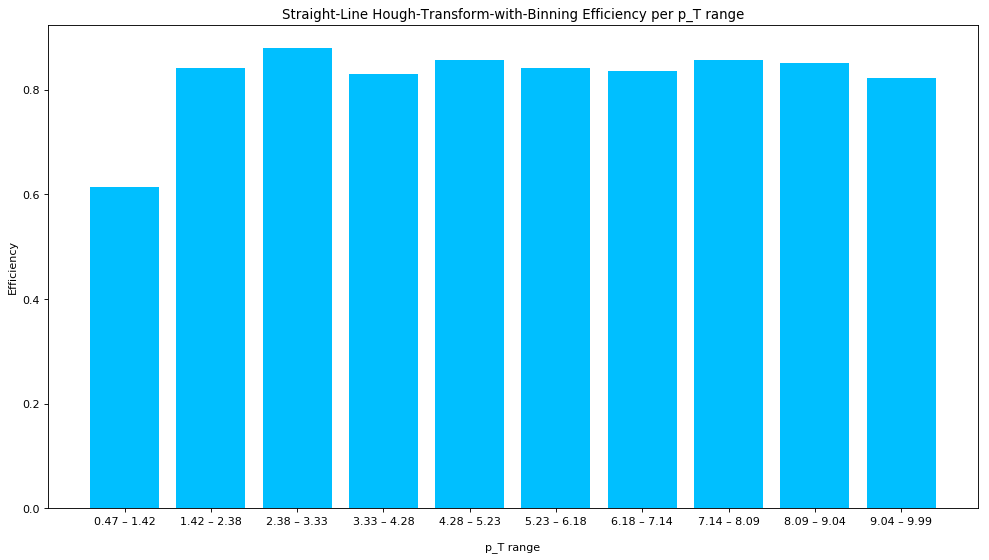

In [35]:
plt.figure(figsize=(15, 8), dpi=80)
plt.xlabel('\np_T range')
plt.ylabel('Efficiency')
plt.bar(list(efficiency_per_p_t.keys()), list(efficiency_per_p_t.values()), color='deepskyblue')
plt.title('Straight-Line Hough-Transform-with-Binning Efficiency per p_T range')
plt.show()